2 / 60 hour in this pet-project

**Dataset on Kaggle web-site.**

**Description**: This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

Link on Kaggle: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/data

Link on Google Drive: https://drive.google.com/file/d/1OoB4P8WC7w1Qn5qmmZmZRkwtGh0BMlKC/view?usp=sharing

This project about build ML pipline with Docker, EDA analyze and build dashboard with Pandas. I'll use CatBoost from Yandex and fundamental methods Machine Learning for comparison. I'll solve example classification, predict fake or real jobs. I'll use basic statistics also.

I want to do description in English in this my pet-project for practice.

In [284]:
# First step is download our data from Kaggle
# I downloaded data on my Google Drive early
# Now download this data in this Google Colab Notebook

! gdown --id 1OoB4P8WC7w1Qn5qmmZmZRkwtGh0BMlKC

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OoB4P8WC7w1Qn5qmmZmZRkwtGh0BMlKC
To: /content/fake_job_postings.csv
100% 50.1M/50.1M [00:00<00:00, 137MB/s] 


In [285]:
# Import need libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# for extend ...

In [286]:
# For conveniences create data base in base SQLite
import sqlite3 # import data base
sqlite3.sqlite_version

'3.37.2'

In [287]:
con = sqlite3.connect("db") # link to data base

def select(sql: str) -> pd.DataFrame:
  """ For create selection data """
  return pd.read_sql(sql, con)

def create_table(df: pd.DataFrame, name_table: str) -> int:
  """ Create table in SQLite database """
  return df.to_sql(f"{name_table}", con, index=False, if_exists='replace')

In [288]:
# Watch on our data
df = pd.read_csv("/content/fake_job_postings.csv")
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [289]:
# Do we have type datetime in dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [290]:
# Success create table
create_table(df, "jons_info")

17880

In [291]:
# Check len results
sql = '''
select count(1)
from jons_info t
'''
print(select(sql))

   count(1)
0     17880


In [292]:
print(len(df))
# Succsess control

17880


Explorary Data Analysis

In [293]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Description our data:

1. job_id - Unique Job ID
2. title - The title of the job ad entry.
3. location - Geographical location of the job ad.
4. department - Corporate department (e.g. sales).
5. salary_range - Indicative salary range (e.g. $50,000-$60,000)
6. company_profile - A brief company description.
7. description - The details description of the job ad.
8. requirements - Enlisted requirements for the job opening.
9. benefits - Enlisted offered benefits by the employer.
10. telecommuting - True for telecommuting positions.
11. has_company_logo - True if company logo is present.
12. has_questions - True if screening questions are present.
13. employment_type - Full-type, Part-time, Contract, etc.
14. required_experience - Executive, Entry level, Intern, etc.
15. required_education - Doctorate, Master’s Degree, Bachelor, etc.
16. industry - Automotive, IT, Health care, Real estate, etc.
17. function - Consulting, Engineering, Research, Sales etc.
18. fraudulent - Classification attribute (target)

In [294]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
16852,16853,Promotions / Marketing Assistant,"US, WI, Madison",NaN,NaN,"LEI Home Enhancements, is an Ohio based compan...",Seeking a candidate to work full time in a pro...,Ability to work up to 30-40 hours/week Strong...,Base plus commissionsPaid TrainingBenefitsVaca...,0,1,0,NaN,NaN,NaN,NaN,Marketing,0
7863,7864,SVP Commercial Operations / COO,"GB, LND, London",NaN,NaN,Adbrain is at the forefront of the data-driven...,OverviewThe last 18 months have seen Adbrain s...,RequirementsThe ideal candidate will have deep...,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Strategy/Planning,0
10975,10976,Veterinarian,"US, CA, Fresno",Small Animal Hospital,NaN,"The Central California SPCA (CCSPCA), establis...",The Central California SPCA is seeking a full ...,California license in good standing and abilit...,Full Time Benefits package includes:-Paid Vaca...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Veterinary,Management,0
11505,11506,Case Management Coach (Currently 50%--Travel/5...,"US, , Denver, CO",NaN,NaN,NaN,--Salary ranges to $95K. (Full-time position w...,--BSN Degree &amp; disease management case man...,Full-time position offers competitive benefits...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
11938,11939,DOT Manager,"US, WV, Buckhannon",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Buckhannon, WV, is acti...",A general knowledge of EHS compliance and OSHA...,NaN,0,1,1,NaN,NaN,NaN,Oil & Energy,Human Resources,0


In [295]:
# View NaN in data
t_nan = df.isna().mean().reset_index()
t_nan.columns = ['variable', 'percent_nan']
t_nan['percent'] = t_nan['percent_nan'] * 100
cm = sns.dark_palette("green", as_cmap=True)
t_nan.style.background_gradient(cmap=cm,subset=['percent'])

,variable,percent_nan,percent
0,job_id,0.000000,0.000000
1,title,0.000000,0.000000
2,location,0.019351,1.935123
3,department,0.645805,64.580537
4,salary_range,0.839597,83.959732
5,company_profile,0.185011,18.501119
6,description,0.000056,0.005593
7,requirements,0.150727,15.072707
8,benefits,0.403244,40.324385
9,telecommuting,0.000000,0.000000


The largest number of passes is colored dark green. View what is it type variable.

In [296]:
(df[['department', 'salary_range', 'benefits',
    'requirements', 'company_profile', 'employment_type',
    'required_experience', 'required_education', 'industry', 'function']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           6333 non-null   object
 1   salary_range         2868 non-null   object
 2   benefits             10670 non-null  object
 3   requirements         15185 non-null  object
 4   company_profile      14572 non-null  object
 5   employment_type      14409 non-null  object
 6   required_experience  10830 non-null  object
 7   required_education   9775 non-null   object
 8   industry             12977 non-null  object
 9   function             11425 non-null  object
dtypes: object(10)
memory usage: 1.4+ MB


In [297]:
t = df.groupby('salary_range')['salary_range'].agg({'count'}).reset_index()
t.tail(10)

,salary_range,count
864,96000-120000,1
865,96000-144000,1
866,96000-240000,1
867,960000-1200000,3
868,962-962,1
869,99000-99999,2
870,Dec-25,1
871,Jun-18,1
872,Oct-15,1
873,Oct-20,2


We see that not all the data is correct. There are erroneous values. This does not mean that we should delete these values or replace them with something similar to omissions. Perhaps this is real data, which may indicate that the vacancy is fake. To analyze the salary range in more detail, we need to split the two values into two columns.These columns will be created only for analysis, they will not be used as real data.

In [298]:
def apply_salary_range_left(salary_range: str) -> int:
  """ Left value from salary range """
  t_info = ""
  salary_list = salary_range.split("-")
  if len(salary_list) == 1:
    value_left = salary_list[0]
  else:
    value_left, value_right = salary_range.split("-")
  try:
    value_left = int(value_left)
  except:
    t_info = "no_info"
  if t_info == "no_info":
    return "no_info"
  else:
    try:
      value_right = int(value_right)
    except:
      return "no_info"
    return value_left

def apply_salary_range_right(salary_range: str) -> int:
  """ Right value from salary range """
  t_info = ""
  salary_list = salary_range.split("-")
  if len(salary_list) == 1:
    value_right = salary_list[0]
  else:
    value_left, value_right = salary_range.split("-")
  try:
    value_right = int(value_right)
  except:
    t_info = "no_info"
  if t_info == "no_info":
    return "no_info"
  else:
    try:
      value_left = int(value_left)
    except:
      return "no_info"
    return value_right

t['left_value_salary'] = t['salary_range'].apply(apply_salary_range_left)
t['right_value_salary'] = t['salary_range'].apply(apply_salary_range_right)

In [299]:
cm = sns.dark_palette("green", as_cmap=True)
t.sample(10).style.background_gradient(cmap=cm,subset=['left_value_salary', 'right_value_salary'])

,salary_range,count,left_value_salary,right_value_salary
509,35000-60000,4,35000,60000
664,52000-57000,1,52000,57000
829,90-110,1,90,110
386,250000-300000,1,250000,300000
539,38000-75000,1,38000,75000
400,27000-30000,1,27000,30000
291,20000-24000,12,20000,24000
743,70-90,2,70,90
828,90-100,1,90,100
709,60000-80000,28,60000,80000


<Axes: ylabel='Frequency'>

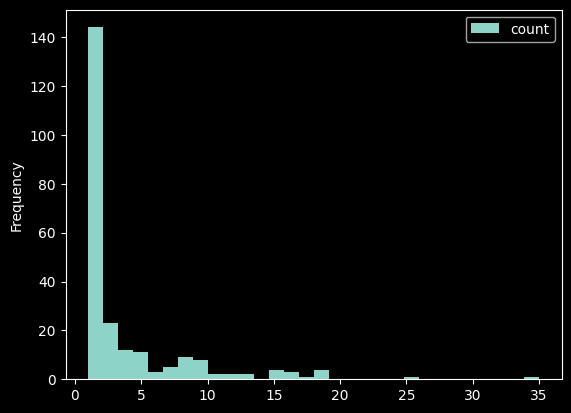

In [300]:
(t.groupby("left_value_salary")['left_value_salary']
 .agg({'count'}).reset_index()
 .sort_values(by='count', ascending=False)
 .plot(kind='hist', bins=30))

We see that the lower salary range has large outliers. Replace "no_info" with 0 and build a box_plot to examine them in more detail.

<Axes: >

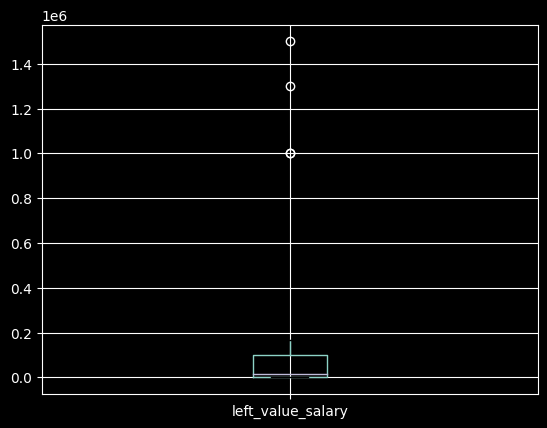

In [301]:
t_left = (t.groupby("left_value_salary")['left_value_salary']
 .agg({'count'}).reset_index()
)
t_left.columns = ['left_value_salary', 'count_salary']
t_left['left_value_salary'] = t['left_value_salary'].apply(lambda x: 0 if x == 'no_info' else int(x))
t_left.boxplot(column='left_value_salary')

We see that we really have two big outliers. We will take this into account when we build a machine learning model.

Now let's do the same for the right border.

<Axes: ylabel='Frequency'>

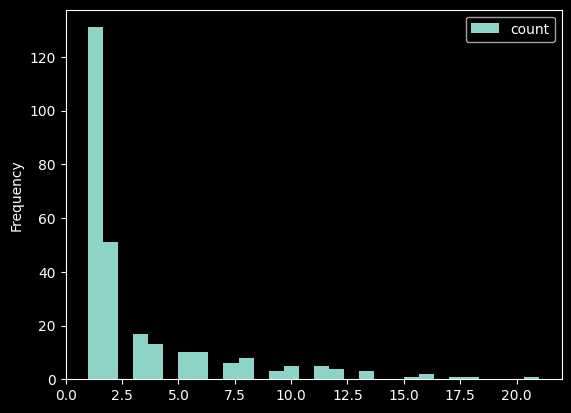

In [302]:
(t.groupby("right_value_salary")['right_value_salary']
 .agg({'count'}).reset_index()
 .sort_values(by='count', ascending=False)
 .plot(kind='hist', bins=30))

<Axes: >

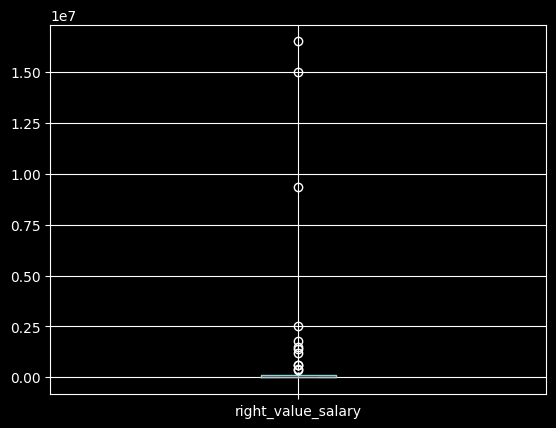

In [303]:
t_right = (t.groupby("right_value_salary")['right_value_salary']
 .agg({'count'}).reset_index()
)
t_right.columns = ['right_value_salary', 'count_salary']
t_right['right_value_salary'] = t['right_value_salary'].apply(lambda x: 0 if x == 'no_info' else int(x))
t_right.boxplot(column='right_value_salary')

There are also outliers in the right border of the salary, there are more than 3 of them.

In [304]:
# Let's see how numeric variables behave
df[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


We see that the company's logo is found on average in about 80% of cases, which means that the remaining 20% may be fake vacancies.

In [305]:
# Now let's look at the Pearson correlation.
cm = sns.dark_palette("green", as_cmap=True)
df.corr().style.background_gradient(cmap=cm)

<ipython-input-305-7103018efcdd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm)


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


The telecommuting variable is relatively strongly dependent on our target variable. Also, according to the Pearson correlation, if there is a company logo, then there must be answers at the screening (There is a strong connection).